## Load data

## Load 2019 regular season and postseason (minus world-series)

In [1]:
import pandas as pd
df = pd.read_csv('./statcast-2019-10-21.csv.gz')

In [2]:
df_postseason = pd.read_csv('./statcast-postseason-2019.csv.gz')

In [3]:
df = pd.concat([df, df_postseason])

In [4]:
df = df[pd.to_datetime(df.game_date).dt.year == 2019]

In [5]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
731207,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,595777,519326,field_out,hit_into_play,NaN,NaN,NaN,NaN,NaN,"Athletics challenged (catch or drop), call on ...",R,L,R,OAK,SEA,X,7.0,fly_ball,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12,Bot,83.41,57.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,38.0,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.003,0.0,1.0,0.0,0.0,3.0,103,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731208,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,strikeout,called_strike,NaN,NaN,NaN,NaN,NaN,Nick Hundley called out on strikes.,R,R,R,OAK,SEA,S,2.0,NaN,1,2,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,102,4,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731209,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,3,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731210,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,ball,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,B,NaN,NaN,0,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,2,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731211,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731212,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,640461,519326,field_out,hit_into_play,NaN,NaN,NaN,NaN,NaN,Chad Pinder flies out to left fielder Domingo ...,R,R,R,OAK,SEA,X,7.0,fly_ball,0,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12,Bot,74.28,105.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,38.0,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.003,0.0,1.0,0.0,0.0,3.0,101,2,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731213,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,640461,519326,NaN,foul,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731214,NaN,2019-03-21,NaN,NaN,NaN,Fernando Rodney,553882,407845,strikeout,called_strike,NaN,NaN,NaN,NaN,NaN,Omar Narvaez called out on strikes.,R,L,R,OAK,SEA,S,2.0,NaN,2,2,2019,NaN,NaN,NaN,NaN,571745.0,570267.0,NaN,2,12,Top,NaN,Na

## Load player name -> MLB ID mapping

In [6]:
player_ids = pd.read_csv('~/Downloads/playerid_list.csv')

In [7]:
player_ids.head()

,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBCODE,RETROSHEETCODE
0,Ausmus,Brad,3,AUSMUS19690414A,110385.0,ausmb001
1,Bagwell,Jeff,4,BAGWELL19680527A,110432.0,bagwj001
2,Berkman,Lance,6,BERKMAN19760210A,204020.0,berkl001
3,Biggio,Craig,7,BIGGIO19651214A,110987.0,biggc001
4,Blum,Geoff,8,BLUM19730426A,150398.0,blumg001


In [8]:
player_ids['mlbname'] = player_ids.apply(lambda x: str(x['FIRSTNAME']) + ' ' + str(x['LASTNAME']), axis=1)

In [9]:
# backwards compat
player_ids.rename({'MLBCODE': 'MLBID'}, axis=1, inplace=True)

In [10]:
batter_ids = player_ids.copy()
batter_ids.columns = [f'batter_{c.lower()}' for c in batter_ids.columns]

In [11]:
batter_names = {int(x.MLBID): x.mlbname for _, x in player_ids[~player_ids.MLBID.isnull()].iterrows()}

In [12]:
pitcher_ids = player_ids.copy()
pitcher_ids.columns = [f'pitcher_{c.lower()}' for c in pitcher_ids.columns]

### Add image URLs

In [13]:
import numpy as np
img_url = 'http://gdx.mlb.com/images/gameday/mugshots/mlb/{}@2x.jpg'
player_ids['img'] = player_ids.MLBID.apply(lambda x: img_url.format(int(x)) if not np.isnan(x) else '')
player_ids.head()

,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img
0,Ausmus,Brad,3,AUSMUS19690414A,110385.0,ausmb001,Brad Ausmus,http://gdx.mlb.com/images/gameday/mugshots/mlb...
1,Bagwell,Jeff,4,BAGWELL19680527A,110432.0,bagwj001,Jeff Bagwell,http://gdx.mlb.com/images/gameday/mugshots/mlb...
2,Berkman,Lance,6,BERKMAN19760210A,204020.0,berkl001,Lance Berkman,http://gdx.mlb.com/images/gameday/mugshots/mlb...
3,Biggio,Craig,7,BIGGIO19651214A,110987.0,biggc001,Craig Biggio,http://gdx.mlb.com/images/gameday/mugshots/mlb...
4,Blum,Geoff,8,BLUM19730426A,150398.0,blumg001,Geoff Blum,http://gdx.mlb.com/images/gameday/mugshots/mlb...


## Merge season data with name mappings

In [14]:
df = df.merge(batter_ids, left_on='batter', right_on='batter_mlbid', how='left')
df = df.merge(pitcher_ids, left_on='pitcher', right_on='pitcher_mlbid', how='left')
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_mlbid,batter_retrosheetcode,batter_mlbname,pitcher_lastname,pitcher_firstname,pitcher_playerid,pitcher_davenportcode,pitcher_mlbid,pitcher_retrosheetcode,pitcher_mlbname
0,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,595777,519326,field_out,hit_into_play,...,595777.0,profj001,Jurickson Profar,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
1,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,strikeout,called_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
2,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
3,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,ball,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
4,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745788,SI,2019-09-29,95.8,-2.9206,5.8811,Joe Ross,596019,605452,NaN,ball,...,596019.0,NaN,Francisco Lindor,Ross,Joe,70485.0,ROSS19930521A,605452.0,NaN,Joe Ross
745789,FF,2019-09-29,93.3,1.6800,5.8749,Eduardo Rodriguez,593643,593958,NaN,swinging_strike,...,593643.0,NaN,Hanser Alberto,Rodriguez,Eduardo,67588.0,RODRIGUEZ19930407A,593958.0,NaN,Eduardo Rodriguez
745790,FF,2019-09-29,94.2,-3.1781,5.6962,Lance Lynn,518934,458681,NaN,called_strike,...,518934.0,lemad001,DJ LeMahieu,Lynn,Lance,58410.0,LYNN19870512A,458681.0,lynnl001,Lance Lynn
745791,FF,2019-09-29,92.8,-1.9036,6.2428,Jeff Hoffman,663757,656546,NaN,ball,...,663757.0,NaN,Trent Grisham,Hoffman,Jeff,105425.0,HOFFMAN19930108A,656546.0,NaN,Jeff Hoffman


In [15]:
df.batter_mlbname.isnull().sum()

2005

In [16]:
df['batter_mlbname'].fillna('unknown', inplace=True)
df['pitcher_mlbname'] = df.player_name

In [17]:
df.shape

(745793, 103)

# Model Inputs

## Wins

In [18]:
gb = df.groupby('game_pk')
game_scores = gb[['post_home_score', 'post_away_score']].max()
game_scores.head()

,post_home_score,post_away_score
game_pk,,
564734,4,11
564735,3,1
564736,5,1
564737,7,2
564738,5,2


In [19]:
from sklearn.preprocessing import OrdinalEncoder
batter_encoder = OrdinalEncoder().fit(df.batter.unique().reshape((-1, 1)))
df['batter_encoding'] = batter_encoder.transform(df.batter.values.reshape((-1, 1))).reshape(-1).astype(int)

In [20]:
away_batters = df[df.inning_topbot.eq('Top')].groupby(['game_pk']).apply(lambda x: x.batter_encoding.unique().tolist())
home_batters = df[df.inning_topbot.eq('Bot')].groupby(['game_pk']).apply(lambda x: x.batter_encoding.unique().tolist())

In [108]:
def calc_plate_appearances(df):
    df_pa = (df[['game_pk', 'batter_encoding', 'at_bat_number']]
        .drop_duplicates().groupby(['game_pk', 'batter_encoding'])
        .size()
        .reset_index()
        .rename({0: 'plate_appearances'}, axis=1)
    )
    encodings = df_pa.groupby('game_pk').apply(lambda x: x.batter_encoding.to_list())
    pas = df_pa.groupby('game_pk').apply(lambda x: x.plate_appearances.to_list())
    return pd.DataFrame({'batter_encodings': encodings, 'plate_appearances': pas})

away_pas = calc_plate_appearances(df[df.inning_topbot.eq('Top')])
home_pas = calc_plate_appearances(df[df.inning_topbot.eq('Bot')])

In [142]:
away_pas.head()

,batter_encodings,plate_appearances
game_pk,,
564734,"[5, 61, 105, 215, 399, 495, 609, 624, 826]","[5, 5, 5, 5, 5, 5, 5, 5, 5]"
564735,"[4, 5, 59, 61, 105, 399, 495, 609, 622, 624]","[3, 4, 1, 4, 4, 3, 4, 4, 4, 4]"
564736,"[5, 59, 61, 105, 215, 399, 495, 622, 624, 826]","[4, 4, 2, 4, 4, 4, 4, 4, 1, 3]"
564737,"[5, 61, 105, 215, 399, 495, 609, 622, 826]","[4, 4, 4, 4, 4, 4, 4, 4, 4]"
564738,"[83, 99, 193, 200, 209, 231, 280, 440, 568]","[4, 4, 4, 4, 3, 4, 4, 4, 3]"


In [110]:
from sklearn.preprocessing import OrdinalEncoder
pitcher_encoder = OrdinalEncoder().fit(df.pitcher.unique().reshape((-1, 1)))
df['pitcher_encoding'] = pitcher_encoder.transform(df.pitcher.values.reshape((-1, 1))).reshape(-1).astype(int)

In [ ]:
def calc_innings_pitched(df):
    df_pa = (df[['game_pk', 'pitcher_encoding', 'inning']]
        .drop_duplicates().groupby(['game_pk', 'pitcher_encoding'])
        .size()
        .reset_index()
        .rename({0: 'innings_pitched'}, axis=1)
    )
    encodings = df_pa.groupby('game_pk').apply(lambda x: x.pitcher_encoding.to_list())
    ip = df_pa.groupby('game_pk').apply(lambda x: x.innings_pitched.to_list())
    return pd.DataFrame({'pitcher_encodings': encodings, 'innings_pitched': ip})

away_ips = calc_innings_pitched(df[df.inning_topbot.eq('Bot')])
home_ips = calc_innings_pitched(df[df.inning_topbot.eq('Top')])

In [ ]:
away_ips.head()

In [111]:
len(pitcher_encoder.categories_[0])

831

In [144]:
away_pitchers = df[df.inning_topbot.eq('Bot')].groupby(['game_pk']).apply(lambda x: x.pitcher_encoding.unique().tolist())
home_pitchers = df[df.inning_topbot.eq('Top')].groupby(['game_pk']).apply(lambda x: x.pitcher_encoding.unique().tolist())

In [119]:
away_pas.plate_appearances

game_pk
564734                [5, 5, 5, 5, 5, 5, 5, 5, 5]
564735             [3, 4, 1, 4, 4, 3, 4, 4, 4, 4]
564736             [4, 4, 2, 4, 4, 4, 4, 4, 1, 3]
564737                [4, 4, 4, 4, 4, 4, 4, 4, 4]
564738                [4, 4, 4, 4, 3, 4, 4, 4, 3]
                           ...                   
599362                [4, 4, 5, 4, 4, 4, 5, 4, 5]
599364                [4, 5, 5, 3, 4, 4, 5, 5, 5]
599365             [4, 4, 2, 4, 3, 1, 4, 4, 4, 4]
599366          [4, 1, 4, 4, 4, 4, 4, 1, 1, 3, 4]
599367    [4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 3, 1, 5]
Name: plate_appearances, Length: 2459, dtype: object

# Model

In [197]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt


n_batters = len(batter_encoder.categories_[0])
n_pitchers = len(pitcher_encoder.categories_[0])

def fill_array(indices, n, n_total):
    x = np.zeros((len(indices), n_total))
    for j, i in enumerate(indices):
        v = 1 if n is None else n.iloc[j]
        x[j, i] = v
    return x

x_away_batters = fill_array(away_pas.batter_encodings, away_pas.plate_appearances, n_batters)
x_home_batters = fill_array(home_pas.batter_encodings, home_pas.plate_appearances, n_batters)

# x_away_pitchers = fill_array(away_pitchers, None, n_pitchers)
# x_home_pitchers = fill_array(home_pitchers, None, n_pitchers)

x_away_pitchers = fill_array(away_ips.pitcher_encodings, away_ips.innings_pitched, n_pitchers)
x_home_pitchers = fill_array(home_ips.pitcher_encodings, home_ips.innings_pitched, n_pitchers)

deltas = (game_scores['post_away_score'] - game_scores['post_home_score']).values


with pm.Model() as model:
    β_b_sigma = pm.HalfNormal('β_b_sigma', .1)
    β_b = pm.HalfNormal('β_b', β_b_sigma, shape=n_batters)

    β_p_sigma = pm.HalfNormal('β_p_sigma', .1)
    β_p = pm.HalfNormal('β_p', β_p_sigma, shape=n_pitchers)

    score_away = tt.dot(x_away_batters, β_b) - tt.dot(x_home_pitchers, β_p)
    score_home = tt.dot(x_home_batters, β_b) - tt.dot(x_away_pitchers, β_p)

    error = pm.HalfNormal('error', 1)
    y1 = pm.Normal('y1', score_away, error, observed=game_scores.post_away_score)
    y2 = pm.Normal('y2', score_home, error, observed=game_scores.post_home_score)

    mean_field = pm.fit(15000, method='advi')

Average Loss = 13,609: 100%|██████████| 15000/15000 [01:31<00:00, 164.20it/s]   
Finished [100%]: Average Loss = 13,611


In [198]:
trace = mean_field.sample()

/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1819c0c50>,
      dtype=object)

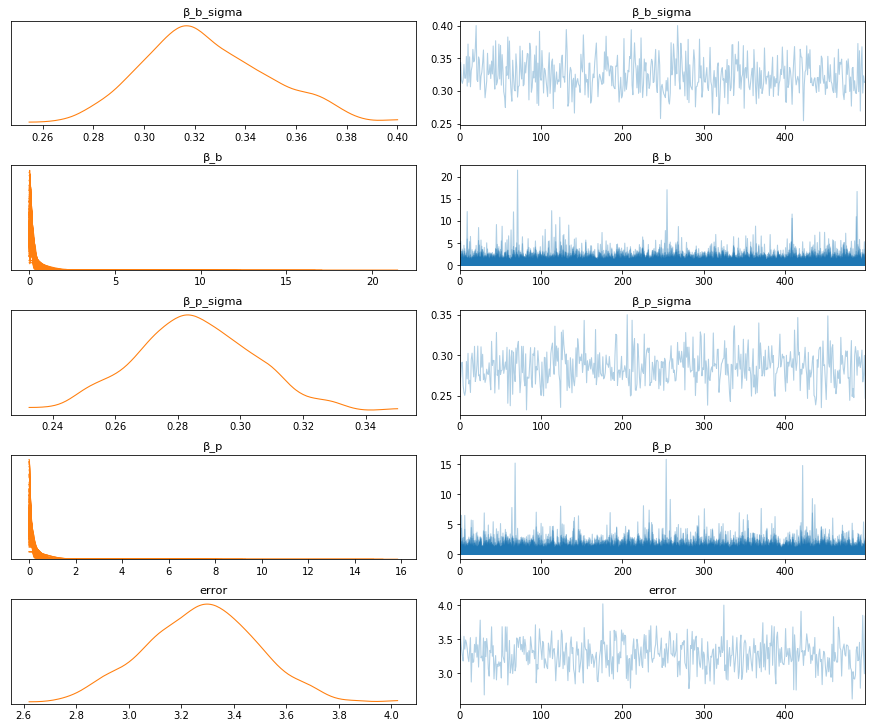

In [199]:
pm.traceplot(trace, combined=True)

In [200]:
trace['β_b'].mean(), trace['β_p'].mean()

(0.20612475886156467, 0.16738278260775732)

In [201]:
ppc = pm.sample_posterior_predictive(trace, model=model)
y1_s, y2_s = ppc['y1'], ppc['y2']

100%|██████████| 500/500 [00:02<00:00, 185.55it/s]


(array([  3.,   5.,  38., 152., 533., 731., 639., 282.,  60.,  16.]),
 array([-16.62120184, -13.65794246, -10.69468309,  -7.73142371,
         -4.76816433,  -1.80490495,   1.15835442,   4.1216138 ,
          7.08487318,  10.04813256,  13.01139193]),
 <a list of 10 Patch objects>)

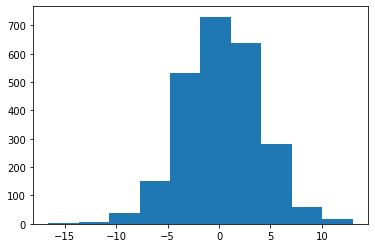

In [202]:
import matplotlib.pyplot as plt
plt.hist(((y1_s - y2_s) - deltas).mean(axis=0))

In [203]:
import scipy.stats as ss
idx = np.arange(n_batters)
zz = pd.DataFrame({'batter_encoding': idx, 'm': trace['β_b'].mean(axis=0), 's': trace['β_b'].std(axis=0),
                   'sort_key': np.quantile(trace['β_b'], 0.5, axis=0)})
zz['name'] = batter_encoder.inverse_transform(zz.batter_encoding.values.reshape(-1, 1))
zz['name'] = zz.name.map(batter_names)
zz.sort_values('m', ascending=False)

,batter_encoding,m,s,sort_key,name
821,821,0.458402,0.478229,0.304249,Zack Godley
886,886,0.367174,0.320425,0.263923,Lane Thomas
936,936,0.359967,0.366740,0.259692,Taylor Clarke
390,390,0.356099,0.269775,0.280554,Breyvic Valera
431,431,0.354689,0.641726,0.219783,Brock Stewart
...,...,...,...,...,...
400,400,0.097587,0.073750,0.076258,Brandon Drury
794,794,0.097553,0.074909,0.072315,Rowdy Tellez
669,669,0.086209,0.078997,0.060477,Steven Duggar
759,759,0.085197,0.066774,0.067851,J.P. Crawford
